# House Prediction

**Dataset variables:**

* LotFrontage: Linear feet of street connected to property

* LotArea: Lot size in square feet

* TotalBsmtSF: Total square feet of basement area

* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms) - categorical

* Fireplaces: Number of fireplaces - categorical

* PoolArea: Pool area in square feet

* GarageCars: Size of garage in car capacity - categorical

* WoodDeckSF: Wood deck area in square feet

* ScreenPorch: Screen porch area in square feet

Read text file to get idea about columns
https://drive.google.com/file/d/1SCh62kuo6M8iOFzwZ4wddi5jeIctNamx/view?usp=sharing

## 1. Data reading & first glance

In [208]:
import pandas as pd
import numpy as np

import sklearn
#sklearn. __version__ # Make sure to use updated version

# To split the data into train and test
from sklearn.model_selection import train_test_split

# To implement grid search (the process of tuning parameters with K-Fold Cross Validation)
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# To fill missing values using impute
from sklearn.impute import SimpleImputer

#Import std scaler
from sklearn.preprocessing import StandardScaler

# import the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Accurac metrics to chk model performance
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# To plot graphs
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

# To creat a pipeline
from sklearn.pipeline import make_pipeline

#If you want pipe steps presented like text
from sklearn import set_config

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

# For static plots
%matplotlib inline
# Or:
#%matplotlib notebook  # For interactive plots

# To get analysis of entire data
from ydata_profiling import ProfileReport

from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_rows', 1000)


In [67]:
# reading House Prediction dataset
url = "https://drive.google.com/file/d/1D-r9lCti2VObmEZV1m7YuR1kcrI9HXiy/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

HP_data = pd.read_csv(path)
HP_data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive',
       'MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu',
       'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Id', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrTyp

## 2.Basic Exploration &  Data Cleaning 

In [68]:
#report = ProfileReport(HP_data)
#report

In [69]:
HP_data.drop(columns='Id', inplace=True)

In [70]:
# Step 1: Identify columns with high missing values (more than 80%)
missing_summary = HP_data.isnull().sum().sort_values(ascending=False)
#Converting into percentage
high_missing_features = missing_summary[missing_summary / HP_data.shape[0] > 0.8].index.tolist()
high_missing_features

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [71]:
#pd.set_option('display.max_rows', 1500)
HP_data.loc[
    HP_data['PoolQC'].isnull() | 
    HP_data['MiscFeature'].isnull()| 
    HP_data['Alley'].isnull() | 
    HP_data['Fence'].isnull(), 
    ['PoolArea','PoolQC', 'MiscVal','MiscFeature', 'Street','Alley', 'Fence', 'Expensive']
]

,PoolArea,PoolQC,MiscVal,MiscFeature,Street,Alley,Fence,Expensive
0,0,NaN,0,NaN,Pave,NaN,NaN,0
1,0,NaN,0,NaN,Pave,NaN,NaN,0
2,0,NaN,0,NaN,Pave,NaN,NaN,0
3,0,NaN,0,NaN,Pave,NaN,NaN,0
4,0,NaN,0,NaN,Pave,NaN,NaN,0
...,...,...,...,...,...,...,...,...
1455,0,NaN,0,NaN,Pave,NaN,NaN,0
1456,0,NaN,0,NaN,Pave,NaN,MnPrv,0
1457,0,NaN,2500,Shed,Pave,NaN,GdPrv,1
1458,0,NaN,0,NaN,Pave,NaN,NaN,0


In [72]:
HP_data.loc[
    HP_data['BsmtQual'].isnull() | 
    HP_data['BsmtCond'].isnull() |
    HP_data['BsmtExposure'].isnull() | 
    HP_data['BsmtFinType1'].isnull() | 
    HP_data['BsmtFinType2'].isnull(),
    ['TotalBsmtSF','BsmtQual', 'BsmtCond', 
     'BsmtExposure','BsmtFinSF1', 'BsmtFinType1',
     'BsmtFinSF2','BsmtFinType2','BsmtUnfSF',
     'BsmtFullBath','BsmtHalfBath']]

,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
17,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
39,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
90,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
102,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
156,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
182,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
259,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
332,3206,Gd,TA,No,1124,GLQ,479,NaN,1603,1,0
342,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
362,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0


In [73]:
BasementColumns_to_replace = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# Create a mask to identify rows that are not 332 or 948
mask = ~HP_data.index.isin([332, 948])

# Replace NaN with 'NA' in the selected columns, except for rows 332 and 948
HP_data.loc[mask, BasementColumns_to_replace] = HP_data.loc[mask, BasementColumns_to_replace].fillna("NA")


In [74]:
# MasVnrArea: Masonry veneer area in square feet
# MasVnrType: Masonry veneer type
# Area > 0 and Tpe is NaN
MasVnrType_null_MasVnrArea = HP_data.loc[
    HP_data['MasVnrType'].isnull() & 
    ~HP_data['MasVnrArea'].isnull() &
    HP_data['MasVnrArea'] > 0.0,
    ['MasVnrArea','MasVnrType']]

MasVnrType_null_MasVnrArea

,MasVnrArea,MasVnrType
624,288.0,NaN
773,1.0,NaN
1230,1.0,NaN
1300,344.0,NaN
1334,312.0,NaN


In [75]:
# Create a mask to identify rows that are True for MasVnrType_null
mask0 = HP_data.index.isin(MasVnrType_null_MasVnrArea.index)

# Replace NaN with 'CBlock' i.e. cinder Block in the selected columns
HP_data.loc[mask0, 'MasVnrType'] = HP_data.loc[mask0, 'MasVnrType'].fillna("CBlock")

Replace 5 rows of NaN with 'CBlock' i.e. cinder Block as MasVnrArea is greater than 0

In [76]:
HP_data.loc[HP_data['MasVnrType'].isnull(),
            ['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
1,0.0,NaN
3,0.0,NaN
5,0.0,NaN
8,0.0,NaN
9,0.0,NaN
10,0.0,NaN
12,0.0,NaN
15,0.0,NaN
17,0.0,NaN
18,0.0,NaN


In [77]:
# Replace NaN with 'None' in the selected column
HP_data['MasVnrType'] = HP_data.loc[:,'MasVnrType'].fillna("None")

In [78]:
HP_data.loc[HP_data['FireplaceQu'].isnull(),
            ['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


In [80]:
HP_data.loc[
    HP_data['GarageType'].isnull() | 
    HP_data['GarageFinish'].isnull() |
    HP_data['GarageQual'].isnull() | 
    HP_data['GarageCond'].isnull(),
    ['GarageArea','GarageCars', 'YearBuilt', 'YearRemodAdd','GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageArea,GarageCars,YearBuilt,YearRemodAdd,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond
39,0,0,1955,1955,NaN,NaN,NaN,NaN,NaN
48,0,0,1920,2008,NaN,NaN,NaN,NaN,NaN
78,0,0,1968,1968,NaN,NaN,NaN,NaN,NaN
88,0,0,1915,1982,NaN,NaN,NaN,NaN,NaN
89,0,0,1994,1995,NaN,NaN,NaN,NaN,NaN
99,0,0,1959,1959,NaN,NaN,NaN,NaN,NaN
108,0,0,1919,2005,NaN,NaN,NaN,NaN,NaN
125,0,0,1935,1982,NaN,NaN,NaN,NaN,NaN
127,0,0,1930,1950,NaN,NaN,NaN,NaN,NaN
140,0,0,1971,1971,NaN,NaN,NaN,NaN,NaN


NA is category representing no fireplace, no pool, no extra feature, no alle access, no fence, no garage

In [85]:
Columns_to_replace_NaN = ['FireplaceQu', 'PoolQC', 'MiscFeature','Alley', 'Fence', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Replace NaN with 'NA' in the selected columns
HP_data.loc[:, Columns_to_replace_NaN] = HP_data.loc[:, Columns_to_replace_NaN].fillna("NA")

In [ ]:
pd.set_option('display.max_rows', 1500)
HP_data.loc[:,['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']]

In [86]:
# Separate the rows where GarageArea is 0
no_garage_condition = (HP_data['GarageArea'] == 0) & (HP_data['GarageYrBlt'].isnull())

# Replace GarageYrBlt with 0 where GarageArea is 0
HP_data.loc[no_garage_condition, 'GarageYrBlt'] = 0

In [87]:
HP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [88]:
HP_data.duplicated().sum()

0

### 3. Checking highly corelated features

In [89]:
# Step 2: Identify numeric and categorical columns
num_features = HP_data.select_dtypes(include=['int64', 'float64'])
numeric_features = num_features.columns.tolist()
categorical_features = HP_data.select_dtypes(include=['object']).columns.tolist()

# Step 3: Correlation Analysis for numeric features
correlation_matrix = num_features.corr()
correlation_with_target = correlation_matrix['Expensive'].sort_values(ascending=False)

# Step 4: Prepare results
results = {
    "numeric_features": numeric_features,
    "categorical_features": categorical_features,
    "correlation_with_target": correlation_with_target # Top correlations with the target variable
}

results

{'numeric_features': ['LotArea',
  'LotFrontage',
  'TotalBsmtSF',
  'BedroomAbvGr',
  'Fireplaces',
  'PoolArea',
  'GarageCars',
  'WoodDeckSF',
  'ScreenPorch',
  'Expensive',
  'MSSubClass',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'GarageYrBlt',
  'GarageArea',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'MiscVal',
  'MoSold',
  'YrSold'],
 'categorical_features': ['MSZoning',
  'Condition1',
  'Heating',
  'Street',
  'CentralAir',
  'Foundation',
  'ExterQual',
  'ExterCond',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'KitchenQual',
  'FireplaceQu',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition2',
  'BldgType',
  'HouseStyle',
  

In [90]:
# Find pairs of highly correlated features
threshold = 0.8  # Set your threshold for "high" correlation
high_corr_pairs = correlation_matrix.where((correlation_matrix > threshold) & (correlation_matrix <= 1))

# Display highly correlated pairs
high_corr_pairs

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold
LotArea,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BedroomAbvGr,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fireplaces,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PoolArea,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCars,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.882475,NaN,NaN,NaN,NaN,NaN,NaN
WoodDeckSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ScreenPorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Expensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Find feature pairs
high_corr = np.where((correlation_matrix > threshold) & (correlation_matrix < 1))
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr)]

# Display the pairs
print("Highly Correlated Pairs:")
for pair in high_corr_pairs:
    print(pair)

Highly Correlated Pairs:
('TotalBsmtSF', '1stFlrSF')
('GarageCars', 'GarageArea')
('1stFlrSF', 'TotalBsmtSF')
('GrLivArea', 'TotRmsAbvGrd')
('TotRmsAbvGrd', 'GrLivArea')
('GarageArea', 'GarageCars')


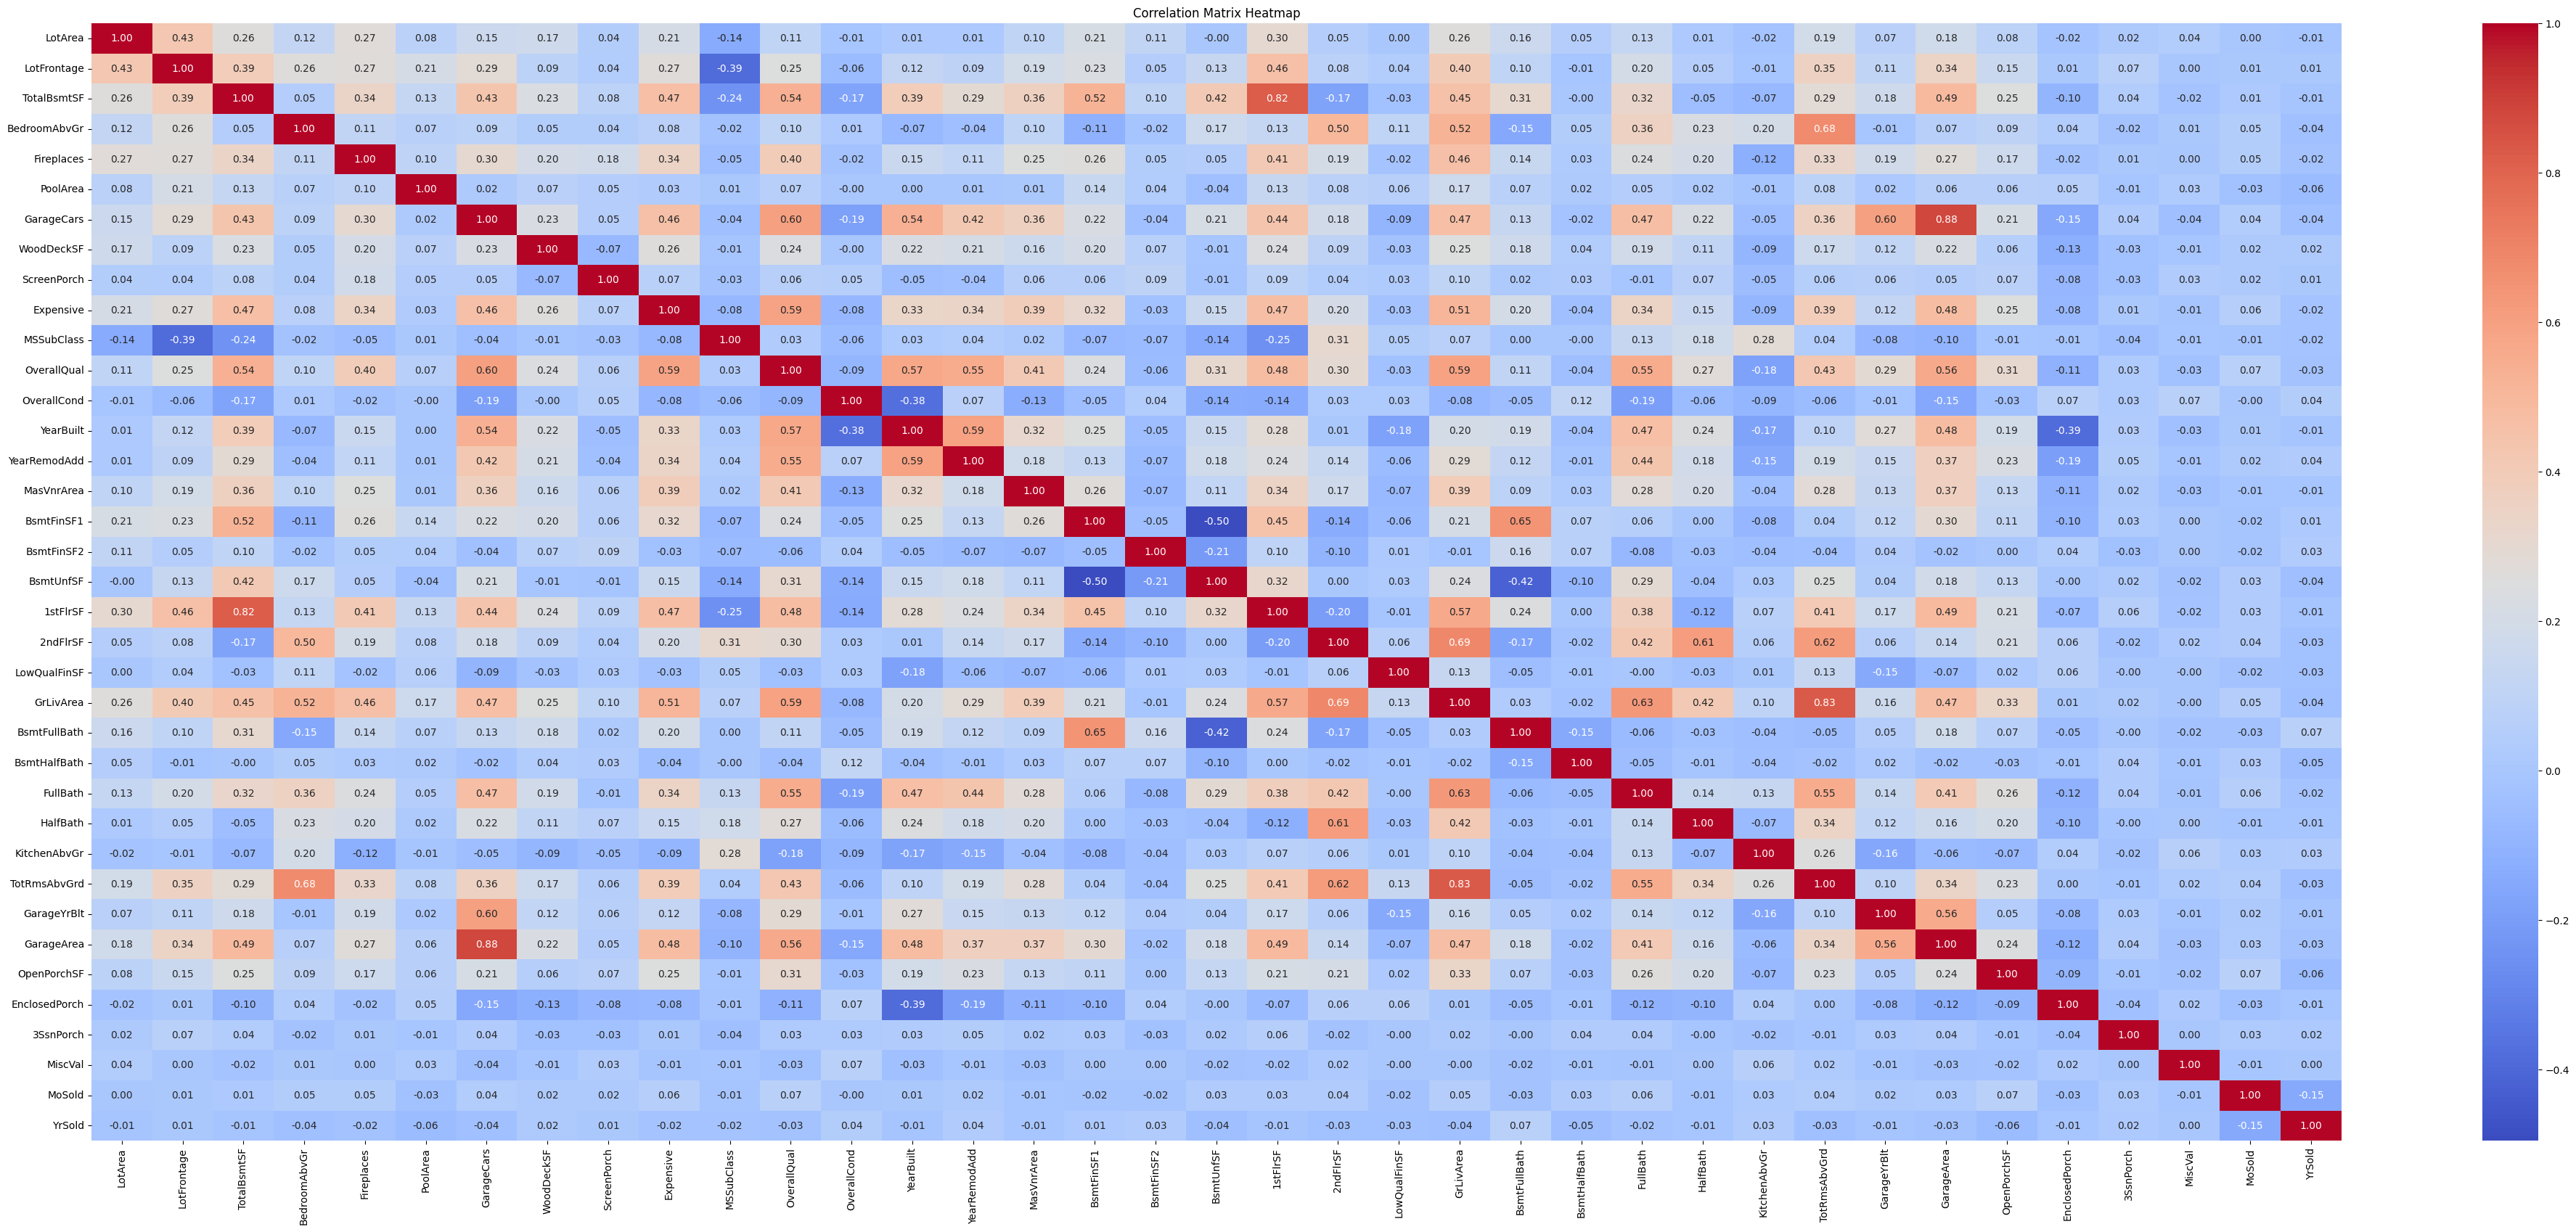

In [93]:
# Compute correlation matrix
correlation_matrix = num_features.corr()

# Create a heatmap
plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

The target column (what we want our model to predict) is usually denoted as `Y` and we call it a `label`. We will "pop" it out from the rest of the data:

The target is just a bunch of zeros and ones. 1 means the expensive and 0 means cheap:

In [94]:
# X and Y creation
Y = HP_data.pop("Expensive")
X = HP_data

The "feature vector" (the columns used to predict the target) is denoted as `X`.

In [ ]:
#X.hist(figsize=(10, 8));

## 3. Train-test split

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize.

Here, we're using the function `train_test_split` to shuffle the observations randomly and create the train and test sets for both the `X` and the `y` objects at the same time, ensuring that they are shuffled the same way:

In [95]:
# data splitting
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 123)

## 4. Categorical encoding - "Automated" approach (Using Pipelines)

In the manual approach, to encode the categorical columns numerically, we have:

1. Selected the categorical columns.
2. Fitted a `OneHotEncoder` to them.
3. Transformed the categorical columns with the encoder.
4. Converted the sparse matrix into a dataframe.
5. Recovered the names of the columns.
6. Concatenated the one-hot columns with the numerical columns.

All these steps can be synthetised by using Scikit-Learn Pipelines and specifically something called `ColumnTransformer`, which allows us to apply different transformations to two or more groups of columns: in our case, categorical and numerical columns.

This process is also called creating "branches" in the pipeline. One branch for the categorical columns and another for the numerical columns. Each branch will contain as many transformers as we want. Then, the branches will meet again, and the transformed columns will be automatically concatenated. Let's see the process in action:

### 4.1. Creating the "numeric pipe" and the "categoric pipe"

In [ ]:
# 0. Set the config so that we can view our preprocessor, and to transform output from numpy arrays to pandas dataframes
set_config(display="diagram")
set_config(transform_output="pandas")

# 1. defining categorical & numerical columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# select categorical and numerical column names
#excluding number column
#X_cat_columns = X.select_dtypes(exclude="number").columns

#including number column
#X_num_columns = X.select_dtypes(include="number").columns

# Specify the columns to scale
columns_to_scale = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'PoolArea', 
                            'WoodDeckSF', 'ScreenPorch', 'MasVnrArea',
                            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
                            'LowQualFinSF', 'GrLivArea', 'GarageArea',
                            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal']

# 2. Create a numerical pipeline with imputation and scaling
numeric_scale_pipe1 = make_pipeline(
    SimpleImputer(),  # Impute missing values with the mean
    StandardScaler()  # Apply standard scaling
)

numcolumns = ['BedroomAbvGr', 'Fireplaces','GarageCars', 'MSSubClass', 'OverallQual', 'OverallCond',
                    'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                    'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'MoSold',
                    'YrSold']
numeric_pipe2 = make_pipeline(
    SimpleImputer(strategy='median'),  # Impute missing values with the median
)

##### first approach with make_column_transformer and three branches

* make_column_transformer() - This is a shorthand for the ColumnTransformer constructor; it does not require, and does not permit, naming the transformers.

* ColumnTransformer() and make_column_transformer() are same. It just different way of writing

In [183]:
# 3. categorical pipeline

# 3.1. Define categories for ordinal encoding
ordinal_cols = [
    'Street', 'CentralAir', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinType1', 'KitchenQual', 'FireplaceQu', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
    'LotConfig', 'LandSlope', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'MasVnrType', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'Functional', 
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 
    'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
]

# 3.2. Define categories for one hot encoding
onehot_cols = ['MSZoning', 'Condition1', 'Heating', 'Foundation', 'Neighborhood', 'Condition2', 'BldgType']


# 3.3. Manually establish the order of the categories for our ordinal features, including "Unknown"
OrdinalRankings = {
    'Street': ["Unknown", "Grvl", "Pave"],
    'CentralAir': ["Unknown", "N", "Y"],
    'ExterQual': ["Unknown", "Po", "Fa", "TA", "Gd", "Ex"],
    'ExterCond': ["Unknown", "Po", "Fa", "TA", "Gd", "Ex"],
    'BsmtQual': ["Unknown", "NA", "Po", "Fa", "TA", "Gd", "Ex"],
    'BsmtCond': ["Unknown", "NA", "Po", "Fa", "TA", "Gd", "Ex"],
    'BsmtExposure': ["Unknown", "NA", "No", "Mn", "Av", "Gd"],
    'BsmtFinType1': ["Unknown", "NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    'KitchenQual': ["Unknown", "Po", "Fa", "TA", "Gd", "Ex"],
    'FireplaceQu': ["Unknown", "NA", "Po", "Fa", "TA", "Gd", "Ex"],
    'Alley': ["Unknown", "NA", "Grvl", "Pave"],
    'LotShape': ["Unknown", "IR3", "IR2", "IR1", "Reg"],
    'LandContour': ["Unknown", "Low", "HLS", "Bnk", "Lvl"],
    'Utilities': ["Unknown", "ELO", "NoSeWa", "NoSewr", "AllPub"],
    'LotConfig': ["Unknown", "Inside", "Corner", "FR2", "FR3", "CulDSac"],
    'LandSlope': ["Unknown", "Sev", "Mod", "Gtl"],
    #'BldgType': ["Unknown", "Twnhs", "TwnhsE", "Duplex", "2fmCon", "1Fam"], 
    'HouseStyle': ['Unknown', '1Story', '1.5Unf', '1.5Fin', '2Story', '2.5Unf', '2.5Fin', 'SFoyer', 'SLvl'],
    'RoofStyle': ['Unknown', 'Flat', 'Shed', 'Gable', 'Hip', 'Mansard', 'Gambrel'],
    'RoofMatl': ['Unknown', 'Roll', 'Tar&Grv', 'CompShg', 'WdShngl', 'ClyTile', 'Metal', 'Membran', 'WdShake'],
    'Exterior1st': ['Unknown', 'AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 
                    'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 
                    'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'Exterior2nd': ['Unknown', 'AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 
                    'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 
                    'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'MasVnrType': ['Unknown', 'None', 'CBlock', 'BrkCmn', 'BrkFace', 'Stone'],
    'BsmtFinType2': ['Unknown', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Unknown', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Electrical': ['Unknown', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
    'Functional': ['Unknown', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'GarageType': ['Unknown', 'NA', 'CarPort', 'Detchd', 'Basment', 'BuiltIn', 'Attchd', '2Types'],
    'GarageFinish': ['Unknown', 'NA', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['Unknown', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['Unknown', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['Unknown', 'N', 'P', 'Y'],
    'PoolQC': ['Unknown', 'NA', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['Unknown', 'NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    'MiscFeature': ['Unknown', 'NA', 'Othr', 'Shed', 'Gar2', 'Elev', 'TenC'],
    'SaleType': ['Unknown', 'Oth', 'ConLD', 'ConLI', 'ConLw', 'Con', 'COD', 'VWD', 'CWD', 'WD', 'New'],
    'SaleCondition': ['Unknown', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']
}

# 3.4. Create the ordinal encoder pipe
ordinal_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Unknown"),
    OrdinalEncoder(
    categories=[OrdinalRankings[col] for col in ordinal_cols if col in OrdinalRankings],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)
)


# 3.5. create one-hot encoder pipe
onehot_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Unknown"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

# 4. full preprocessing: a make_column_transformer with 4 branches: numeric & categorical
preprocessor = make_column_transformer(
    (numeric_scale_pipe1, columns_to_scale),  # Apply the pipeline to numeric columns
    (numeric_pipe2, numcolumns),
    (ordinal_pipe, ordinal_cols),  # Apply ordinal encoding pipeline
    (onehot_pipe, onehot_cols),  # Apply one-hot encoding pipeline
    remainder="passthrough",  # Leave other columns unchanged
    force_int_remainder_cols = False  #stored as indices (int) rather than column names (str).
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['LotFrontage', 'LotArea', 'TotalBsmtSF',
                                  'PoolArea', 'WoodDeckSF', 'ScreenPorch',
                                  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                                  'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'GarageArea',
                                  'O...
                                  'Electrical', 'Functional', 'GarageType',
                                  'GarageFinish', 'GarageQual', 'GarageCond', ...]),
                                ('pipeline-4',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MSZoning', 'Condition1', 'Heating',
                                  'Foundation', 'Neighborhood', 'Condition2',
                                  'BldgType'])])

##### 2. second approach with ColumnTransformer

In [19]:
# # # 3.2.2. defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
# categorical_encoder = ColumnTransformer(
#     transformers=[
#         ("cat_ordinal", OrdinalEncoder(categories=[ExterQual_cats, ExterCond_cats, BsmtQual_cats, BsmtCond_cats, BsmtExposure_cats, BsmtFinType1_cats,
#                                     KitchenQual_cats, FireplaceQu_cats]), ordinal_cols),
#         ("cat_onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_cols),
#     ]
# )

# # # 3.3. categorical pipeline = "N_A" imputer + categorical encoder
# categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
#                                  categorical_encoder
#                                 )

# # 4. full preprocessing: a ColumnTransformer with 2 branches: numeric & categorical
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num_pipe", numeric_pipe, X_num.columns),
#         ("cat_pipe", categorical_pipe, X_cat.columns),
#     ]
# )

# preprocessor

### 4.2. Creating the `full_pipeline` (`preprocessor` + Model)

Pipelines are modular. The `preprocessor` we created above with the `make_column_transformer` can become now a step in a new pipeline, that we'll call `full_pipeline` and will include, as a last step, a Decision Tree model:

### Function to save results of Grid Search

In [ ]:
# Define multiple scoring metrics
scoring_metrics = {
    "f1": make_scorer(f1_score, average="weighted"),
    "accuracy": make_scorer(accuracy_score),
}

# Initialize an empty list to store the results of each trial
Trial_results = []

# Function to run a trial with multiple scoring metrics
def RunTrial(trial_num, search, scoring_methods):
    # Fit the GridSearchCV object
    search.fit(x_train, y_train)

    # Extract best scores for each metric
    best_scores = {f"best_{metric}_score": search.cv_results_[f"mean_test_{metric}"][search.best_index_] for metric in scoring_methods}

    # Collect results
    results = {
        "trial_id": trial_num,
        "best_params": search.best_params_,
        "best_estimator": search.best_estimator_,
    }
    # Add best scores to the results
    results.update(best_scores)

    # Append to trial results list
    Trial_results.append(results)

####  Decision Tree Grid Search 

In [123]:
full_pipeline_DT = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

In [ ]:
# Trial DT
param_grid_trialDT = {
    #"columntransformer__pipeline-1__simpleimputer__strategy": ["mean", "median"],
    #"columntransformer__pipeline-1__standardscaler__with_mean": [True, False],
    #"columntransformer__pipeline-1__standardscaler__with_std": [True, False],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2),
    "decisiontreeclassifier__min_samples_split": range(3, 20),
    "decisiontreeclassifier__criterion": ['gini', 'entropy', 'log_loss'],
}

search_trialDT = GridSearchCV(
    estimator=full_pipeline_DT,
    param_grid=param_grid_trialDT,
    cv=StratifiedKFold(n_splits=5, shuffle=False),
    scoring=scoring_metrics,
    refit="f1",  # Specify the primary metric to determine the best model
    verbose=1
)

RunTrial(trial_num="trialDT", search=search_trialDT, scoring_methods=scoring_metrics.keys())

Fitting 5 folds for each of 1530 candidates, totalling 7650 fits


#### KNN Grid Search

In [205]:
knn_full_pipeline = make_pipeline(preprocessor,
                                  # StandardScaler(),
                                  KNeighborsClassifier()
                                 )
knn_full_pipeline

In [206]:
param_grid_knn = {
    #"columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    #"columntransformer__pipeline-1__standardscaler__with_mean": [True, False],
    #"columntransformer__pipeline-1__standardscaler__with_std": [True, False],
    "kneighborsclassifier__n_neighbors": range(2, 50),
    "kneighborsclassifier__weights": ["uniform", "distance"],
    "kneighborsclassifier__p":[1.0,2.0]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid_knn,
                      cv=StratifiedKFold(n_splits=5, shuffle=False),
                      scoring=scoring_metrics,
                      refit="f1", 
                      verbose=1)

#knn_search.fit(x_train, y_train)

RunTrial(trial_num="trialKnn", search=knn_search, scoring_methods=scoring_metrics.keys())

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


KeyboardInterrupt: 

#### RFC Grid Search

In [218]:
RFC_full_pipeline = make_pipeline(preprocessor,
                                  # StandardScaler(),
                                  RandomForestClassifier()
                                 )
RFC_full_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'TotalBsmtSF', 'PoolArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQ...
                                                   'GarageQual', 'GarageCond', ...]),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [219]:
# Trial RFC
param_grid_trialRFC = {
    "randomforestclassifier__n_estimators" : range(40, 100, 20),
    "randomforestclassifier__max_depth": range(2, 14, 2),
    "randomforestclassifier__min_samples_leaf": range(1, 12, 2),
    "randomforestclassifier__min_samples_split": range(2, 20),
    "randomforestclassifier__criterion": ['gini', 'entropy', 'log_loss'],
}

search_trialRFC = GridSearchCV(
    estimator= RFC_full_pipeline,
    param_grid= param_grid_trialRFC,
    cv=StratifiedKFold(n_splits=5, shuffle=False),
    scoring=scoring_metrics,
    refit="f1",  # Specify the primary metric to determine the best model
    verbose=1
)

RunTrial(trial_num="trialRFC", search=search_trialRFC, scoring_methods=scoring_metrics.keys())

Fitting 5 folds for each of 5832 candidates, totalling 29160 fits


#### Saving results of trial

In [220]:
# Convert results to a DataFrame
Trials_result_df = pd.DataFrame(Trial_results)

# Save the DataFrame to a CSV file
Trials_result_df.to_csv("grid_search_trials_results_classification.csv", index=False)

# Display the results
Trials_result_df

,trial_id,best_params,best_estimator,best_f1_score,best_accuracy_score
0,trialDT,{'decisiontreeclassifier__criterion': 'log_los...,"(ColumnTransformer(remainder='passthrough',\n ...",0.939669,0.940065
1,trialKnn,"{'kneighborsclassifier__n_neighbors': 6, 'knei...","(ColumnTransformer(remainder='passthrough',\n ...",0.933330,0.935802
2,trialKnn,"{'kneighborsclassifier__n_neighbors': 6, 'knei...","(ColumnTransformer(remainder='passthrough',\n ...",0.933330,0.935802
3,trialKnn,"{'kneighborsclassifier__n_neighbors': 6, 'knei...","(ColumnTransformer(remainder='passthrough',\n ...",0.933330,0.935802
4,trialRFC,"{'randomforestclassifier__criterion': 'gini', ...","(ColumnTransformer(remainder='passthrough',\n ...",0.949676,0.952052


## 5. Error analysis

### DT

In [159]:
# test accuracy
accuracy_score(search_trialDT.predict(x_test), y_test)

0.9246575342465754

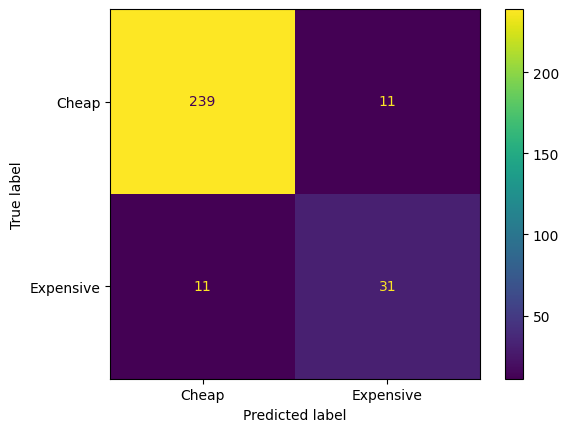

In [160]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);
ConfusionMatrixDisplay.from_estimator(search_trialDT,
                                      x_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

**Watch out!**

Scikit-learn presents confusion matrices in a way that might differ slightly from what you're used to.

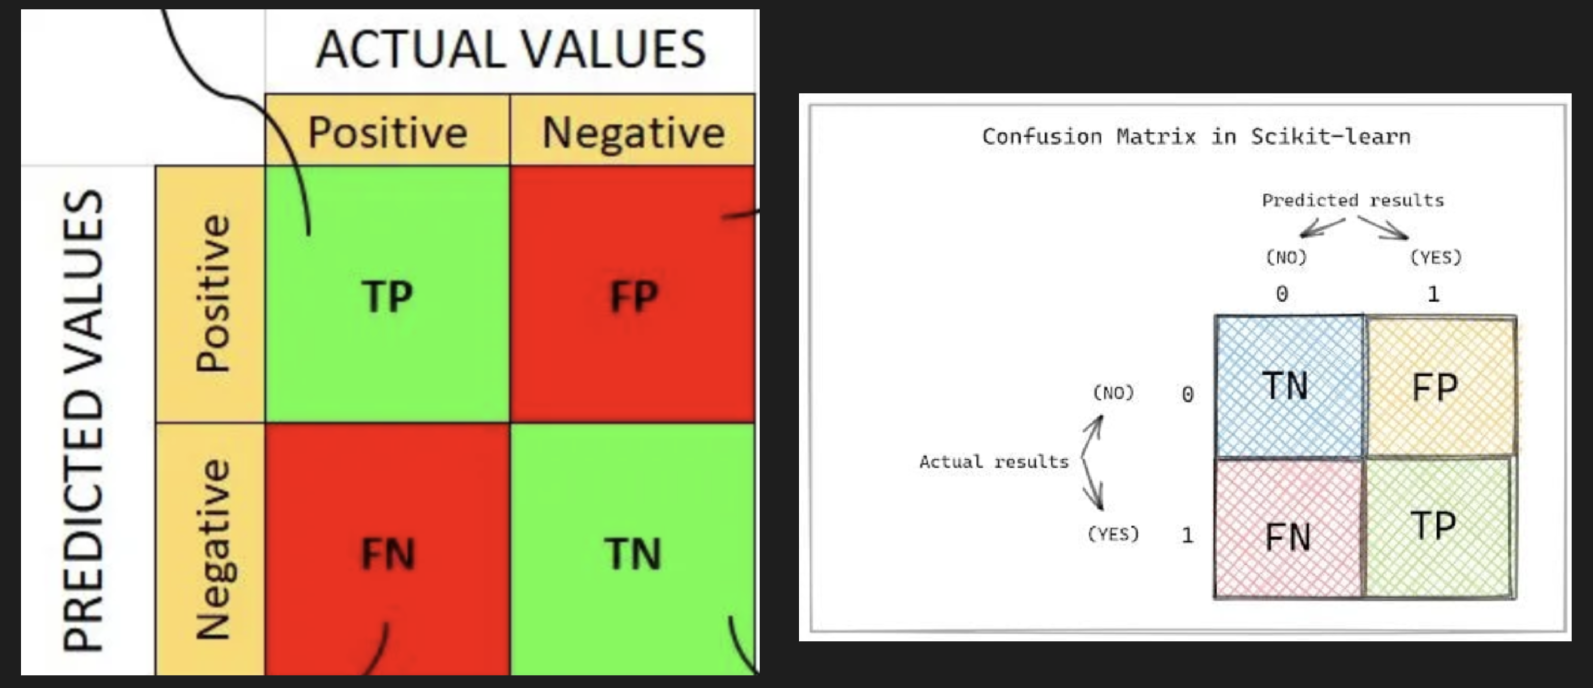

## 6. Final fitting of DT model with best parameters

In [187]:
DecisionTree_pipe = make_pipeline(preprocessor,
                                  #StandardScaler(),
                                  DecisionTreeClassifier(criterion='log_loss', max_depth= 12, min_samples_split=8, min_samples_leaf=7)
                                 )
DecisionTree_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'TotalBsmtSF', 'PoolArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQ...
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=12,
                                        min_samples_leaf=7,
                                        min_samples_split=8))])

In [155]:
DecisionTree_pipe.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'Ove...
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=12,
                                        min_samples_leaf=7,
                                        min_samples_split=8))])

## 7. Final fitting of Knn model with best parameters

In [199]:
kneighbors_pipe = make_pipeline(preprocessor,
                                  # StandardScaler(),
                                  KNeighborsClassifier(n_neighbors=7, weights='distance', p=1)
                                 )
kneighbors_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'TotalBsmtSF', 'PoolArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQ...
                                                   'GarageQual', 'GarageCond', ...]),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=7, p=1))])

In [201]:
kneighbors_pipe.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'TotalBsmtSF', 'PoolArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQ...
                                                   'GarageQual', 'GarageCond', ...]),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=7, p=1))])

## 8. Final fitting of Random Forest Classifier with best parameters

In [221]:
RFC_pipe = make_pipeline(preprocessor,
                        RandomForestClassifier(n_estimators=80, criterion='gini', max_depth=10, min_samples_split=10, min_samples_leaf=1)
                                 )
RFC_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'TotalBsmtSF', 'PoolArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQ...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=10,
                                        n_estimators=80))])

In [230]:
RFC_pipe1 = make_pipeline(preprocessor,
                        RandomForestClassifier()
                                 )
RFC_pipe1.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'TotalBsmtSF', 'PoolArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQ...
                                                   'GarageQual', 'GarageCond', ...]),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [231]:
RFC_pipe1.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'TotalBsmtSF', 'PoolArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQ...
                                                   'GarageQual', 'GarageCond', ...]),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Condition1',
                                                   'Heating', 'Foundation',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType'])])),
                ('randomforestclassifier', RandomForestClassifier())])

## 9. Assesment of all model

In [223]:
def evaluate_model(model_name, model_pipeline, x_train, y_train, x_test, y_test, assessment_df):
    """
    Evaluates the given model and updates the assessment DataFrame with train and test accuracies.

    Parameters:
    - model_name (str): Name of the model to record in the DataFrame.
    - model_pipeline (Pipeline): The pipeline object containing the model and preprocessing.
    - x_train (pd.DataFrame): Training features.
    - y_train (pd.Series): Training labels.
    - x_test (pd.DataFrame): Test features.
    - y_test (pd.Series): Test labels.
    - assessment_df (pd.DataFrame): DataFrame to store the evaluation results.
    
    Returns:
    - pd.DataFrame: Updated assessment DataFrame.
    """
    # Calculate accuracies
    train_accuracy = accuracy_score(y_true=y_train, y_pred=model_pipeline.predict(x_train))
    test_accuracy = accuracy_score(y_true=y_test, y_pred=model_pipeline.predict(x_test))
    
    # Update the DataFrame
    assessment_df.loc[model_name, 'train'] = train_accuracy
    assessment_df.loc[model_name, 'test'] = test_accuracy
    
    return assessment_df

In [232]:
evaluate_model('DT_baseline', DecisionTree_pipe, x_train, y_train, x_test, y_test, assessment_df)

evaluate_model('kneighbors_baseline', kneighbors_pipe, x_train, y_train, x_test, y_test, assessment_df)

evaluate_model('RFC_baseline', RFC_pipe, x_train, y_train, x_test, y_test, assessment_df)

,train,test
RFC_baseline,1.0,1.0
DT_baseline,0.967466,0.917808
kneighbors_baseline,0.943493,0.952055


In [234]:
url = "https://drive.google.com/file/d/15PfmTxmavQCT-f7iY9tgwWxm9t4GRees/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
testing_data_HP = pd.read_csv(path)
testing_data_HP = testing_data_HP.set_index('Id')

testing_data_HP['Expensive'] = RFC_pipe.predict(testing_data_HP)

testing_data_HP['Expensive'].to_csv('submission_classification1.csv')

In [ ]:
# Colab only
#from google.colab import files
#files.download('./submission_classification.csv')